In [5]:
 #1. Load Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [6]:
# Read the data
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
#data info
print("Dataset shape:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nFirst 5 rows:\n", df.head())

Dataset shape: (768, 9)

Data types:
 Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

First 5 rows:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  

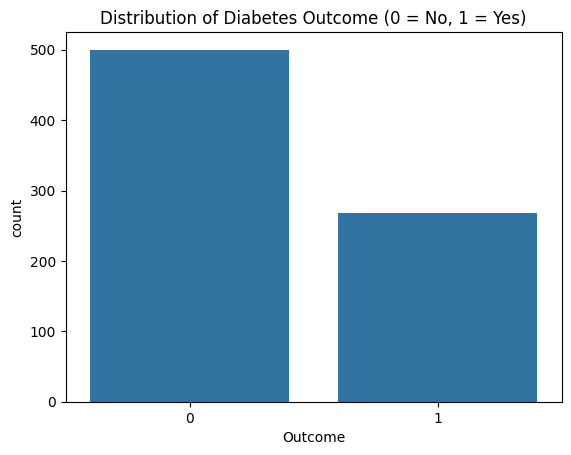

In [9]:
#Target Variable
sns.countplot(x='Outcome', data=df)
plt.title("Distribution of Diabetes Outcome (0 = No, 1 = Yes)")
plt.show()


In [10]:
# Missing Values
print("\nMissing or zero values per column:")
print((df == 0).sum())


Missing or zero values per column:
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [11]:
# Replace zeros with NaN
cols_with_zero = ['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)

In [12]:
# Replace missing values with median (or mean/mode where suitable)
for col in cols_with_zero:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)
print("\nMissing values after imputation:\n", df.isnull().sum())        


Missing values after imputation:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_10052\79991289.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_10052\79991289.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

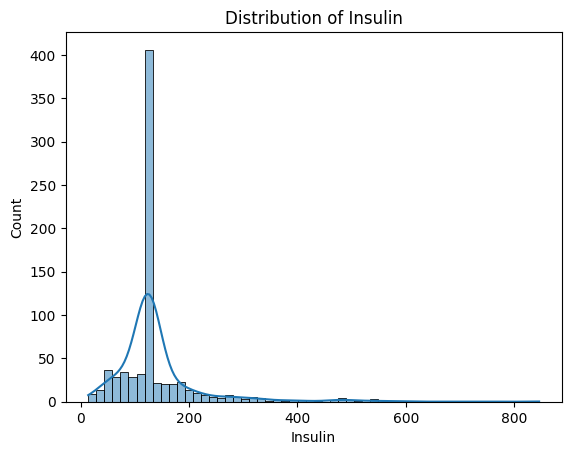

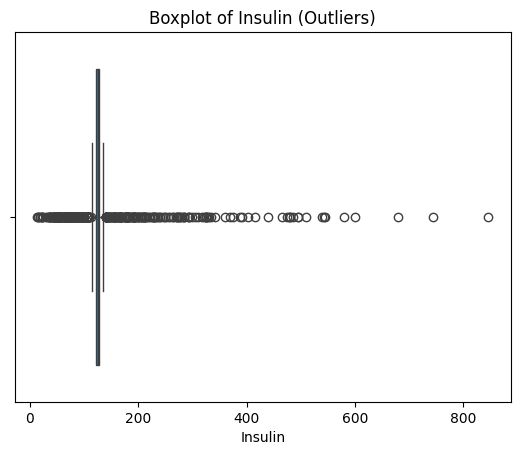

In [13]:
#Insulin
sns.histplot(df['Insulin'], kde=True)
plt.title("Distribution of Insulin")
plt.show()
sns.boxplot(x=df['Insulin'])
plt.title("Boxplot of Insulin (Outliers)")
plt.show()

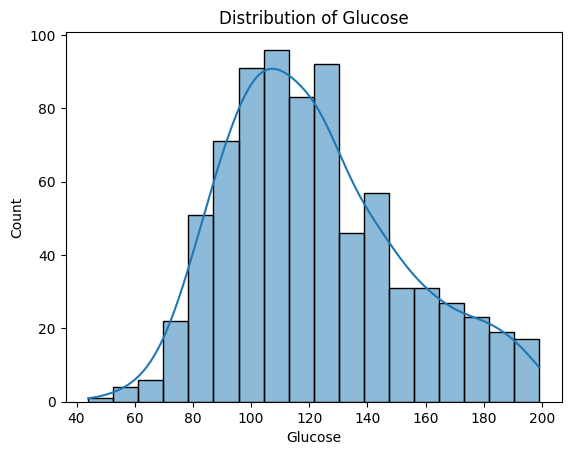

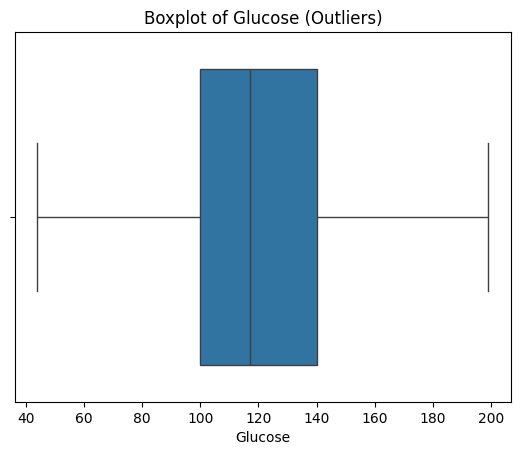

In [14]:
# Glucose
sns.histplot(df['Glucose'], kde=True)
plt.title("Distribution of Glucose")
plt.show()
sns.boxplot(x=df['Glucose'])
plt.title("Boxplot of Glucose (Outliers)")
plt.show()

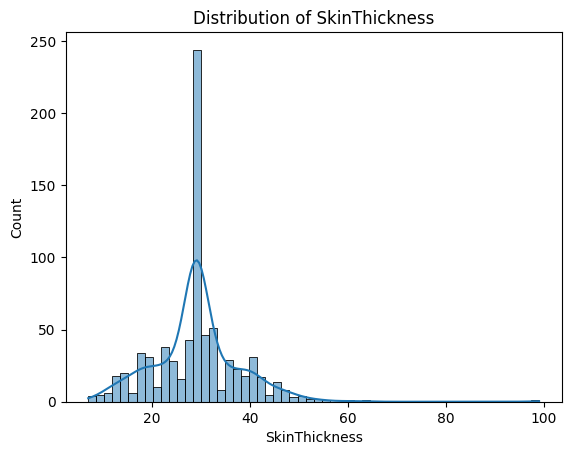

In [15]:
# SkinThickness
sns.histplot(df['SkinThickness'], kde=True)
plt.title("Distribution of SkinThickness")
plt.show()

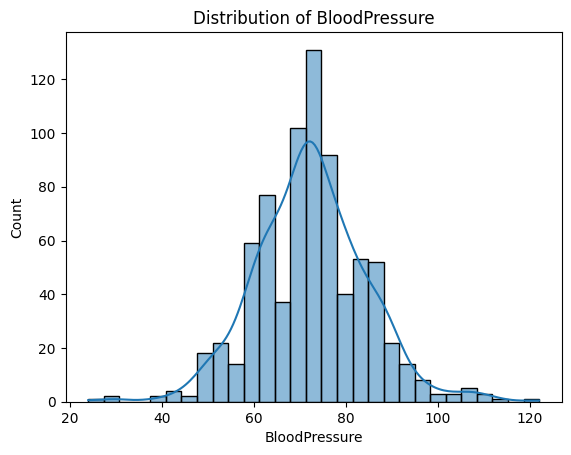

In [16]:
# BloodPressure
sns.histplot(df['BloodPressure'], kde=True)
plt.title("Distribution of BloodPressure")
plt.show()

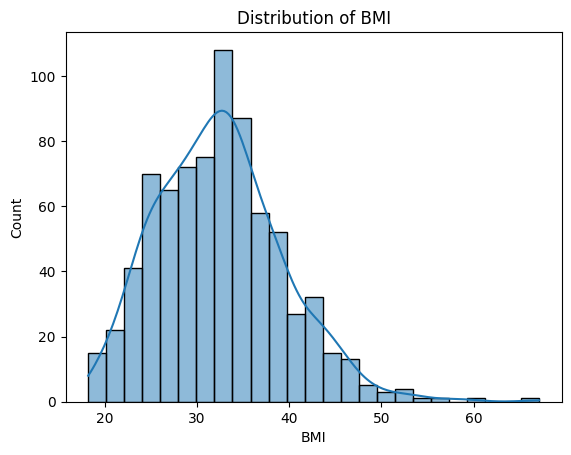

In [17]:
# BMI
sns.histplot(df['BMI'], kde=True)
plt.title("Distribution of BMI")
plt.show()

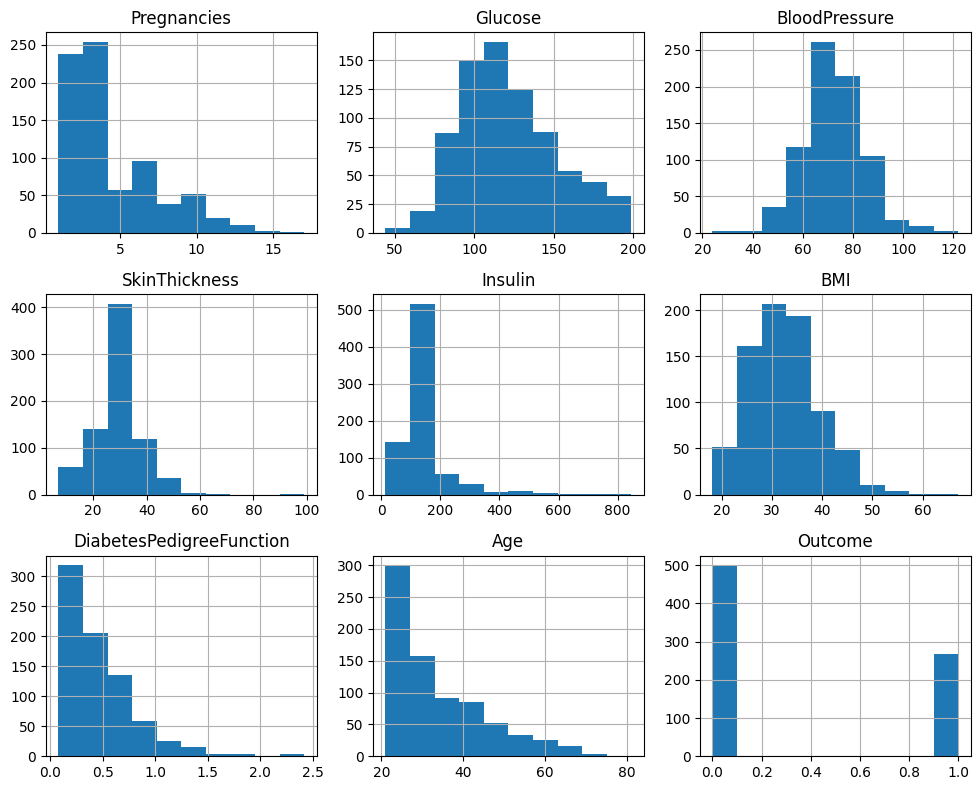

In [18]:
# Histogram of all numerical features
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()


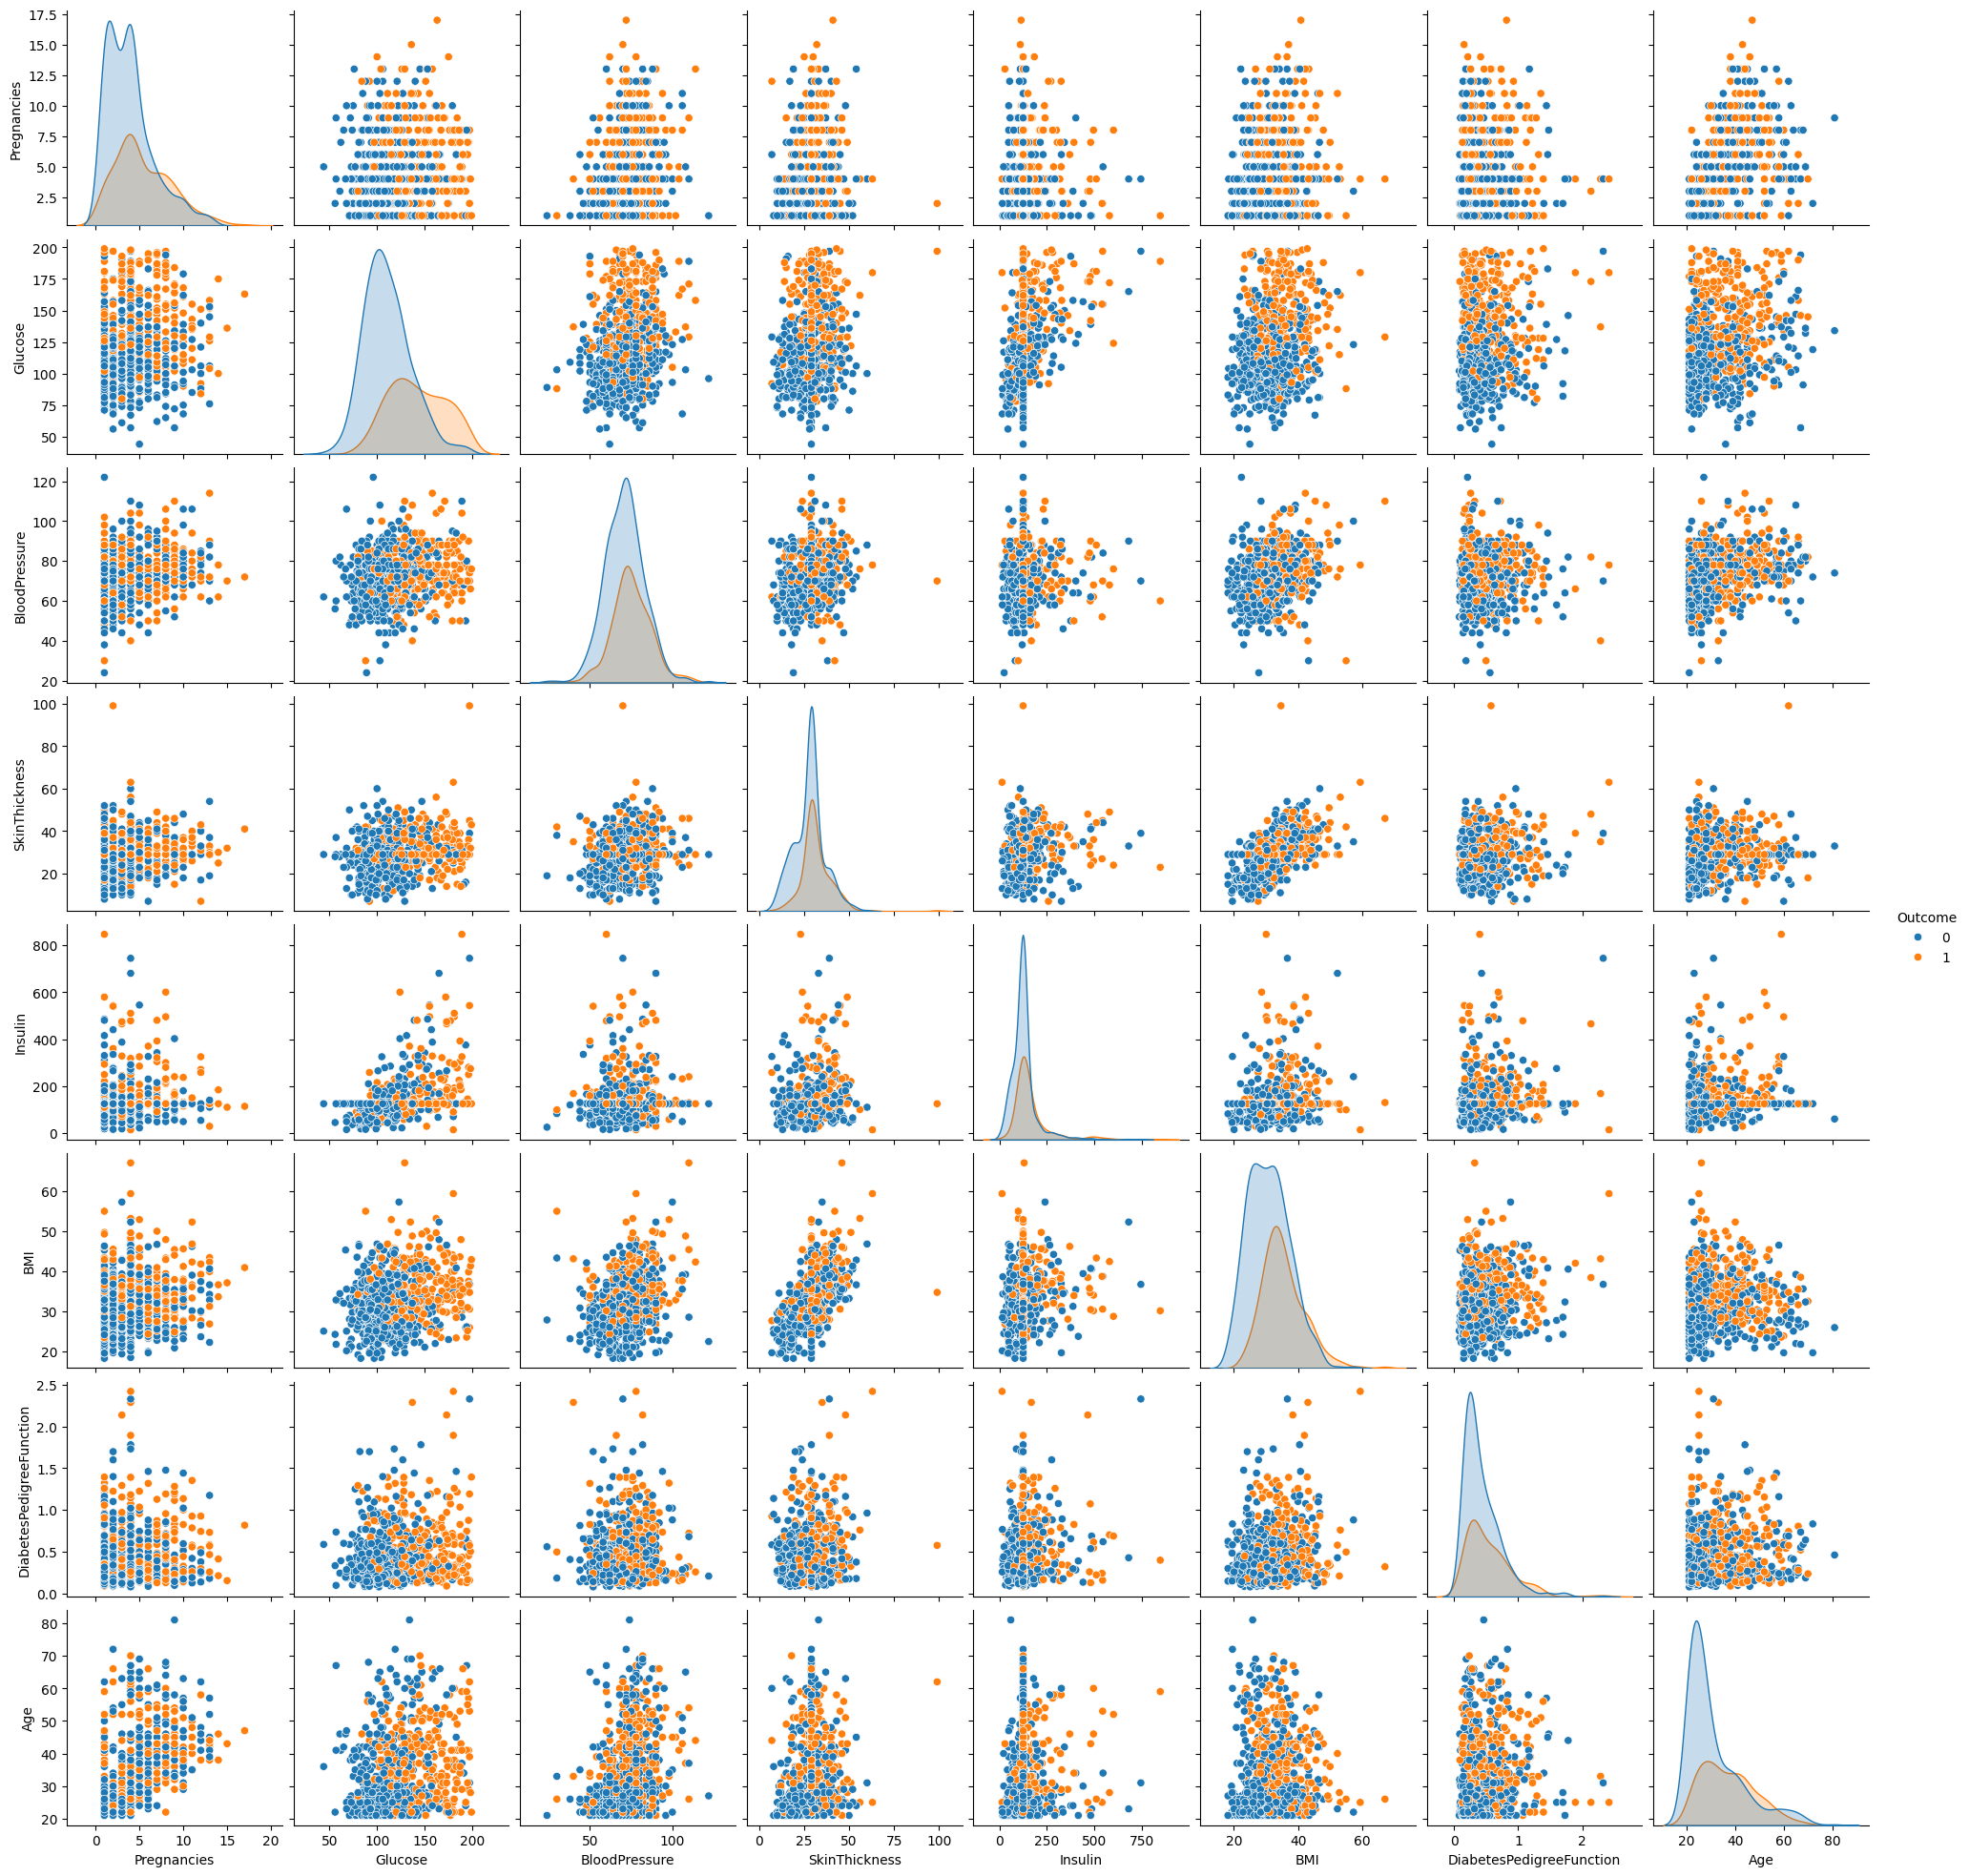

In [19]:
sns.pairplot(df, hue='Outcome')
plt.show()

In [20]:
# StandardScaler and LabelEncoder 
scaler = StandardScaler()
X = df.drop("Outcome", axis=1)
y = df["Outcome"]
X_scaled = scaler.fit_transform(X)

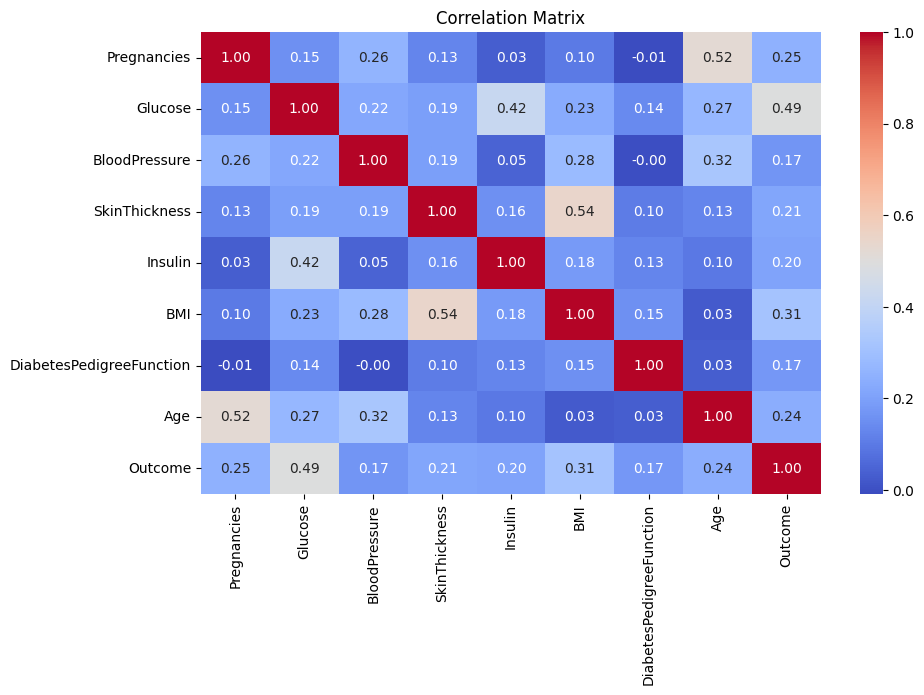

In [21]:
# Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

In [19]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [20]:
#model training and performance

models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else np.zeros(len(y_pred))

    metrics = {
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_proba)
    }
    results.append(metrics)

In [21]:
# Model Performance
results_df = pd.DataFrame(results)
print("\nModel Comparison:\n", results_df)


Model Comparison:
                  Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC
0  Logistic Regression  0.759740   0.673077  0.636364  0.654206  0.824242
1        Random Forest  0.759740   0.650000  0.709091  0.678261  0.828466
2                  SVM  0.746753   0.666667  0.581818  0.621359  0.809917
3        Decision Tree  0.733766   0.609375  0.709091  0.655462  0.728283
4                  KNN  0.714286   0.590164  0.654545  0.620690  0.762075


In [22]:
#save score table
results_df.to_csv("model_results.csv", index=False)

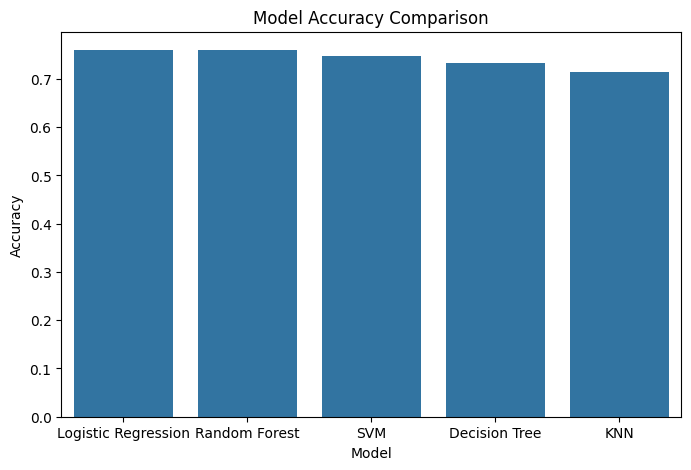

In [23]:
# Visualization of model performance
plt.figure(figsize=(8,5))
sns.barplot(data=results_df, x="Model", y="Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()

In [26]:
import pandas as pd
import joblib

# Convert results to DataFrame
results = pd.DataFrame(results)

# Find best model name
best_model_name = results.loc[results['Accuracy'].idxmax(), 'Model']
print(f"Best model: {best_model_name}")

# Retrieve best model object directly from the trained models dict
best_model = models[best_model_name]

# Save it
joblib.dump(best_model, "best_model.pkl")
print("✅ Best model saved as best_model.pkl")




Best model: Logistic Regression
✅ Best model saved as best_model.pkl
